# Day 30 – TF-IDF for FAQ Retrieval
### Build a Text Similarity Search Engine

Today we will build a **TF-IDF based FAQ retrieval system**.

Given a user's question, the system will return the most similar FAQ answer using **cosine similarity**.

#### Goals:
- Learn TF-IDF vectorization
- Build similarity matrix with cosine similarity
- Retrieve the best FAQ match for any query
- Visualize similarity scores
- Produce a ranked FAQ list

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

print('Libraries loaded.')

Libraries loaded.


## 1. Create Synthetic FAQ Dataset

In [2]:
faq_data = {
    "question": [
        "How do I reset my password?",
        "Why is my payment failing?",
        "How to update my billing email?",
        "App keeps crashing when uploading files.",
        "How can I change my subscription plan?",
        "I cannot login to my account.",
        "The dashboard is not loading properly.",
        "How to contact customer support?"
    ],
    "answer": [
        "You can reset your password by clicking 'Forgot Password' on the login page.",
        "Payments fail due to insufficient balance or incorrect card details.",
        "To update your billing email, go to Settings → Billing → Update Email.",
        "The app may crash due to file size limits. Try a smaller file or update the app.",
        "You can change your subscription plan in Settings → Subscription.",
        "If you can't login, try resetting your password or clearing browser cache.",
        "Dashboard loading issues may be due to heavy traffic. Try refreshing or clearing cache.",
        "You can reach customer support at support@company.com or via live chat."
    ]
}

faq_df = pd.DataFrame(faq_data)
faq_df

,question,answer
0,How do I reset my password?,You can reset your password by clicking 'Forgo...
1,Why is my payment failing?,Payments fail due to insufficient balance or i...
2,How to update my billing email?,"To update your billing email, go to Settings →..."
3,App keeps crashing when uploading files.,The app may crash due to file size limits. Try...
4,How can I change my subscription plan?,You can change your subscription plan in Setti...
5,I cannot login to my account.,"If you can't login, try resetting your passwor..."
6,The dashboard is not loading properly.,Dashboard loading issues may be due to heavy t...
7,How to contact customer support?,You can reach customer support at support@comp...


## 2. Clean Text (Simple Preprocessing)

In [3]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z ]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

faq_df['clean_question'] = faq_df['question'].apply(clean_text)
faq_df[['question', 'clean_question']]

,question,clean_question
0,How do I reset my password?,how do i reset my password
1,Why is my payment failing?,why is my payment failing
2,How to update my billing email?,how to update my billing email
3,App keeps crashing when uploading files.,app keeps crashing when uploading files
4,How can I change my subscription plan?,how can i change my subscription plan
5,I cannot login to my account.,i cannot login to my account
6,The dashboard is not loading properly.,the dashboard is not loading properly
7,How to contact customer support?,how to contact customer support


## 3. TF-IDF Vectorization

In [4]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(faq_df['clean_question'])

tfidf_matrix.shape

(8, 34)

## 4. FAQ Retrieval Function (Cosine Similarity)

In [5]:
def retrieve_faq(query):
    clean_query = clean_text(query)
    query_vec = vectorizer.transform([clean_query])
    similarity_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()

    top_idx = similarity_scores.argmax()
    top_score = similarity_scores[top_idx]

    return top_idx, top_score, similarity_scores

# Test with a sample query
query = "The app crashes when I upload images."
idx, score, sim = retrieve_faq(query)

faq_df.iloc[idx], score

(question                   App keeps crashing when uploading files.
 answer            The app may crash due to file size limits. Try...
 clean_question              app keeps crashing when uploading files
 Name: 3, dtype: object,
 np.float64(0.4714045207910318))

## 5. Visualize Similarity Scores

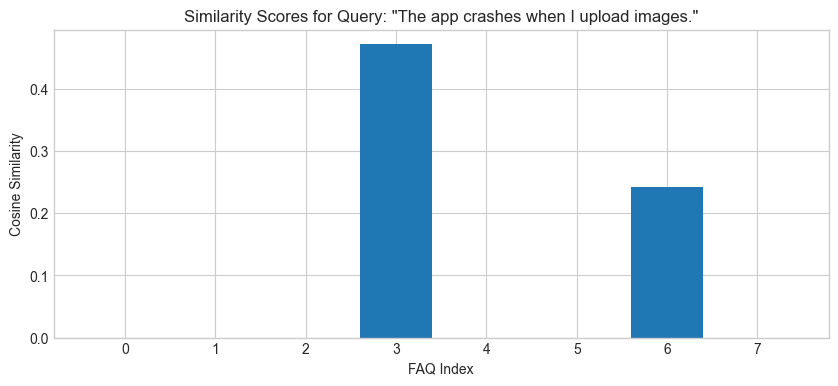

In [6]:
plt.figure(figsize=(10,4))
plt.bar(range(len(sim)), sim)
plt.title('Similarity Scores for Query: "{}"'.format(query))
plt.xlabel('FAQ Index')
plt.ylabel('Cosine Similarity')
plt.show()

## 6. Ranked FAQ Retrieval
Return the top 3 closest FAQs for better UX.

In [7]:
def top_k_faq(query, k=3):
    clean_query = clean_text(query)
    query_vec = vectorizer.transform([clean_query])
    similarity_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()

    top_k_idx = similarity_scores.argsort()[::-1][:k]

    results = []
    for i in top_k_idx:
        results.append({
            "faq_index": int(i),
            "question": faq_df.iloc[i]['question'],
            "answer": faq_df.iloc[i]['answer'],
            "similarity": float(similarity_scores[i])
        })

    return results

top_k_faq(query)

[{'faq_index': 3,
  'question': 'App keeps crashing when uploading files.',
  'answer': 'The app may crash due to file size limits. Try a smaller file or update the app.',
  'similarity': 0.4714045207910318},
 {'faq_index': 6,
  'question': 'The dashboard is not loading properly.',
  'answer': 'Dashboard loading issues may be due to heavy traffic. Try refreshing or clearing cache.',
  'similarity': 0.24177505619265705},
 {'faq_index': 5,
  'question': 'I cannot login to my account.',
  'answer': "If you can't login, try resetting your password or clearing browser cache.",
  'similarity': 0.0}]

## 7. Summary
- Built TF-IDF vectors from FAQ questions
- Cleaned + normalized text
- Converted user queries into TF-IDF vectors
- Computed cosine similarity to rank FAQs
- Retrieved the best answer or top-K results
- Visualized similarity scores

**Deliverable:** `day30_tfidf_faq_retrieval.ipynb`